In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image


In [2]:
print(os.listdir('input/data/'))

['test', 'train']


# Read in the Data

In [58]:
folder_benign_train = 'input/data/train/benign'
folder_malignant_train = 'input/data/train/malignant'

folder_benign_test = 'input/data/test/benign'
folder_malignant_test = 'input/data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Display Data

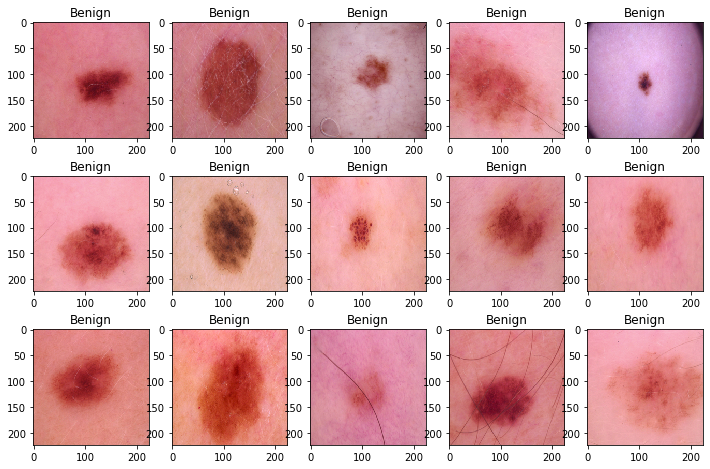

In [4]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()



# Dataset
The dataset is almost balanced. It has 1800 benign samples and 1497 malignant samples

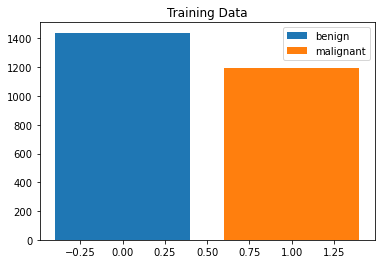

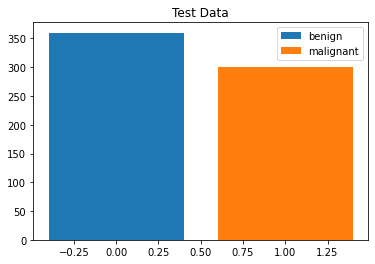

In [5]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()


# Scale values

In [6]:
X_train = X_train/255.
X_test = X_test/255.

# Training a simple Model

In [45]:
# support vector machine classifier
from sklearn.svm import SVC

model = SVC(kernel='rbf')

model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

# Testing Model

In [46]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

print(accuracy_score(y_test, y_pred))

0.8348484848484848


In [47]:
from sklearn.metrics import confusion_matrix 

In [48]:
confusion_matrix(y_test, y_pred)

array([[294,  66],
       [ 43, 257]], dtype=int64)

In [49]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [63]:
test_image = np.asarray(Image.open('input/data/test/benign/1.jpg').resize((224,224)).convert("RGB"))

In [64]:
test_image = test_image/255.

In [65]:
test_image

array([[[0.69411765, 0.54901961, 0.58039216],
        [0.74509804, 0.59215686, 0.61176471],
        [0.7372549 , 0.59607843, 0.60392157],
        ...,
        [0.75294118, 0.61176471, 0.62745098],
        [0.7372549 , 0.61176471, 0.62352941],
        [0.7254902 , 0.6       , 0.61960784]],

       [[0.77647059, 0.61176471, 0.62745098],
        [0.83529412, 0.65882353, 0.67058824],
        [0.82745098, 0.6627451 , 0.67058824],
        ...,
        [0.84313725, 0.68235294, 0.69803922],
        [0.83921569, 0.67843137, 0.69411765],
        [0.83529412, 0.65882353, 0.67058824]],

       [[0.75686275, 0.59607843, 0.61960784],
        [0.81568627, 0.65098039, 0.65882353],
        [0.81176471, 0.65098039, 0.66666667],
        ...,
        [0.82352941, 0.68627451, 0.70196078],
        [0.81960784, 0.66666667, 0.68627451],
        [0.81960784, 0.65098039, 0.68627451]],

       ...,

       [[0.74117647, 0.61568627, 0.62745098],
        [0.81176471, 0.67058824, 0.67058824],
        [0.81176471, 0

X_test[0]

(model.predict(X_test.reshape(X_test.shape[0],-1)))

X_test.shape

In [53]:
X_test[0].shape

(224, 224, 3)

In [54]:
test_image.shape

(224, 224, 3)

lol=X_test.reshape(X_test.shape[0],-1)

lol.shape

In [66]:
test_image = np.array([test_image])

In [67]:
test_image.shape

(1, 224, 224, 3)

In [68]:
model.predict(test_image.reshape(test_image.shape[0],-1))

array([0.])

In [ ]:
ax = fig.add_subplot()
plt.imshow(test_image, interpolation='nearest')

In [59]:
X_test.reshape(X_test.shape[0],-1)

array([[177, 140, 148, ..., 211, 169, 173],
       [255, 204, 245, ..., 236, 181, 213],
       [222, 148, 173, ..., 207, 137, 148],
       ...,
       [  5,   5,   7, ...,   8,   6,   9],
       [166, 131, 135, ..., 195, 149, 151],
       [178, 146, 135, ..., 153, 124, 120]], dtype=uint8)

In [62]:
for filename in os.listdir(folder_benign_test):
    print(os.path.join(folder_benign_test, filename)) 

input/data/test/benign\1.jpg
input/data/test/benign\10.jpg
input/data/test/benign\1003.jpg
input/data/test/benign\1006.jpg
input/data/test/benign\1013.jpg
input/data/test/benign\1018.jpg
input/data/test/benign\1019.jpg
input/data/test/benign\1023.jpg
input/data/test/benign\1025.jpg
input/data/test/benign\1029.jpg
input/data/test/benign\1033.jpg
input/data/test/benign\1034.jpg
input/data/test/benign\1042.jpg
input/data/test/benign\1044.jpg
input/data/test/benign\105.jpg
input/data/test/benign\1055.jpg
input/data/test/benign\1061.jpg
input/data/test/benign\1070.jpg
input/data/test/benign\1074.jpg
input/data/test/benign\1077.jpg
input/data/test/benign\1080.jpg
input/data/test/benign\1087.jpg
input/data/test/benign\1088.jpg
input/data/test/benign\1092.jpg
input/data/test/benign\11.jpg
input/data/test/benign\1110.jpg
input/data/test/benign\1112.jpg
input/data/test/benign\1115.jpg
input/data/test/benign\1118.jpg
input/data/test/benign\1125.jpg
input/data/test/benign\1126.jpg
input/data/test/